In [8]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline

from skimage.filters import threshold_triangle as triangle
from sklearn.preprocessing import quantile_transform
from skimage.filters import unsharp_mask

In [331]:
in_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/nsybIVAf_c.nii"
brain = np.asarray(nib.load(in_file).get_data().squeeze(), dtype='float32')
brain.shape

(1024, 512, 256)

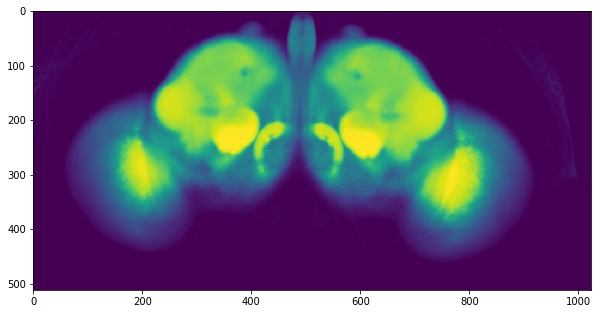

In [264]:
plt.figure(figsize=(10,10))
plt.imshow(brain[:,:,210].T)

In [332]:
brain_thresh = np.copy(brain)

In [333]:
## clip off dim cell bodies
# .61 until 67
# .49 until 86
# .3 until 136 (or end)
brain_thresh[:,:,-67:][brain_thresh[:,:,-67:] < 30000] = 0
brain_thresh[:,:,-86:-67][brain_thresh[:,:,-86:-67] < 25000] = 0
brain_thresh[:,:,:170][brain_thresh[:,:,:170] < 1000] = 0

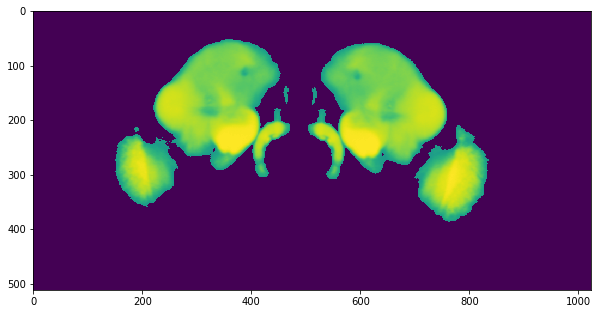

In [336]:
plt.figure(figsize=(10,10))
plt.imshow(brain_thresh[:,:,210].T)

In [356]:
brain_1norm = brain_thresh/np.max(brain_thresh)

In [357]:
## depth correction

for i in range(0,100):
    brain_1norm[:,:,i] += (brain_1norm[:,:,i]**.5)*.04*10**(.01*(126-i))
    #brain_sharp[:,:,i] += (brain_sharp[:,:,i] > 0)*(.00238*(k+1))

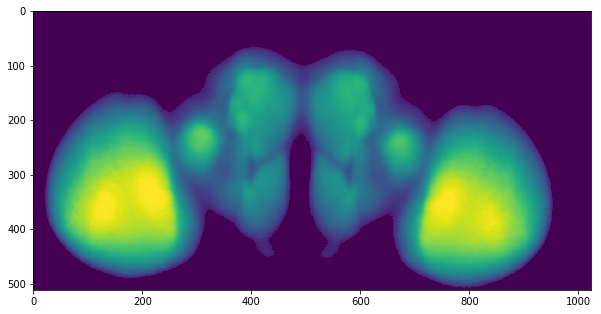

In [358]:
plt.figure(figsize=(10,10))
plt.imshow(brain_1norm[:,:,20].T,vmin=0,vmax=1.1)

In [348]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210507_luke_diego_corr2'
aff = np.eye(4)
img = nib.Nifti1Image(brain_1norm, aff)
img.to_filename(save_file)

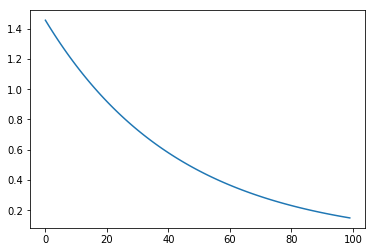

In [350]:
outs = []
for i in range(0,100):
    out = .08*10**(.01*(126-i))
    outs.append(out)
    
plt.plot(outs)

In [359]:
in_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
brain = np.asarray(nib.load(in_file).get_data().squeeze(), dtype='float32')
brain.shape

(1652, 768, 479)

In [360]:
brain = ants.from_numpy(brain)
brain.set_spacing((0.38, 0.38, 0.38))

In [361]:
brain = ants.resample_image(brain,(256,128,49),1,0)

In [363]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/jrc2018_lowres.nii'
aff = np.eye(4)
img = nib.Nifti1Image(brain.numpy(), aff)
img.to_filename(save_file)

In [ ]:
## depth correction

for k,i in enumerate(range(126,225)):
    brain[:,:,i] += (brain[:,:,i] > 0)*(.00238*(k+1))
    
## clip off dim cell bodies
# .61 until 67
# .49 until 86
# .3 until 136 (or end)
brain[:,:,-67:][brain[:,:,-67:] < ] = 0
brain[:,:,67:86][brain[:,:,67:86] < .49] = 0
brain[:,:,86:][brain[:,:,86:] < .3] = 0

In [22]:
# make background nan
brain_copy = brain.copy()
brain_copy[np.where(brain_input < 3000)] = np.nan

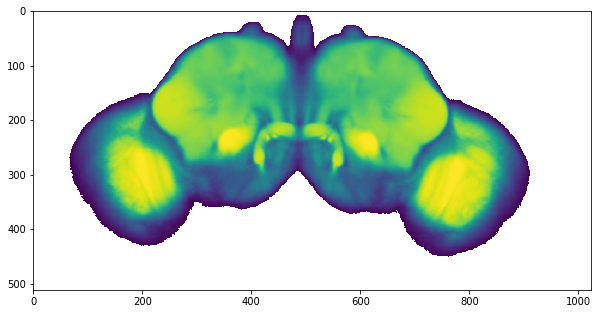

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(brain_copy[:,:,200].T)

In [24]:
brain_out = quantile_transform(brain_copy.flatten().reshape(-1, 1), n_quantiles=500, random_state=0, copy=True)
brain_out = brain_out.reshape(brain.shape);

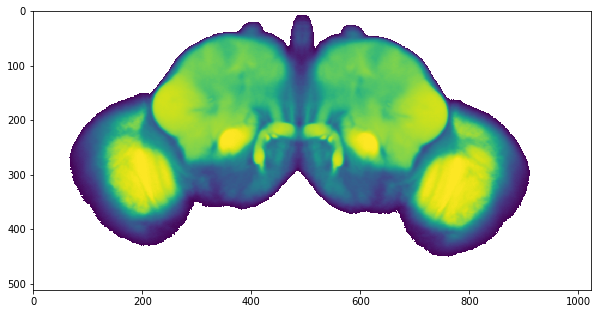

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(brain_out[:,:,200].T)

In [53]:
# renormalize to .3-.7
# a = .3
# b = .7
# brain_input = a + (brain)*(b-a)

# sharpen
brain_1norm = brain/np.max(brain)
brain_sharp = unsharp_mask(brain_1norm, radius=3, amount=3)

In [66]:
brain_1norm = brain/np.max(brain)

# make background nan
brain_copy = brain_1norm.copy()
brain_copy[np.where(brain_copy < .01)] = np.nan

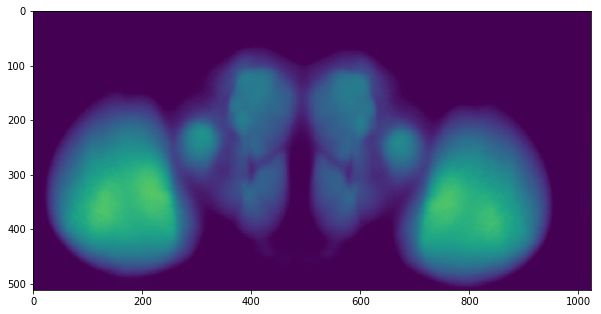

In [116]:
plt.figure(figsize=(10,10))
plt.imshow(brain_1norm[:,:,20].T,vmin=0,vmax=1)

In [231]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210507_luke_diego_corr'
aff = np.eye(4)
img = nib.Nifti1Image(brain_1norm, aff)
img.to_filename(save_file)

In [241]:
.07*10**(.01*(126-100))

0.12737906010269887

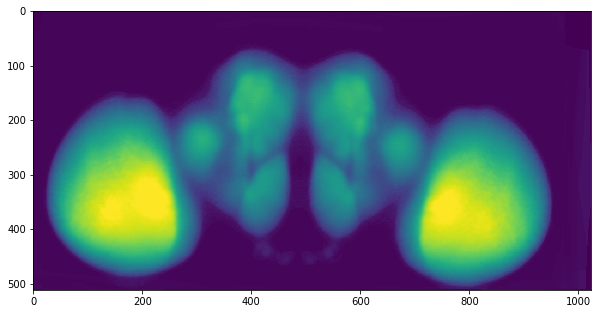

In [226]:
plt.figure(figsize=(10,10))
plt.imshow(brain_1norm[:,:,10].T,vmin=0,vmax=1.1)

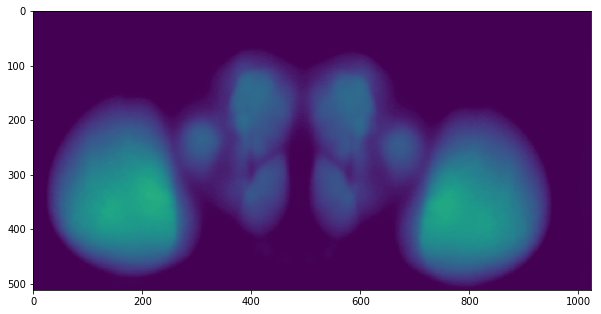

In [228]:
plt.figure(figsize=(10,10))
plt.imshow(brain_1norm[:,:,10].T,vmin=0,vmax=1.1)

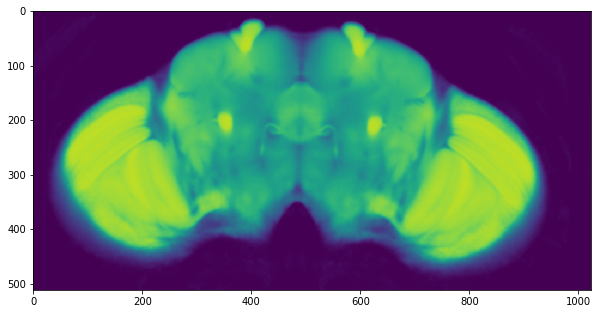

In [167]:
plt.figure(figsize=(10,10))
plt.imshow(brain_1norm[:,:,160].T,vmin=0,vmax=1.1)

In [97]:
brain_out = quantile_transform(brain_1norm.flatten().reshape(-1, 1), n_quantiles=500, random_state=0, copy=True)
brain_out = brain_out.reshape(brain.shape);

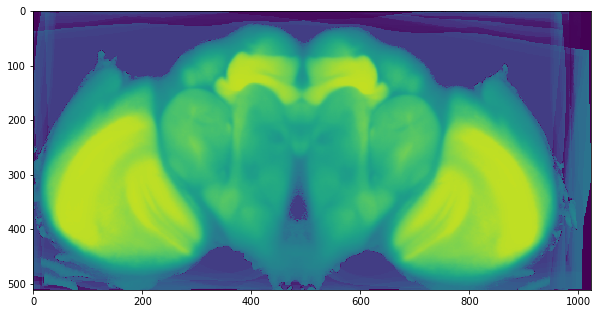

In [100]:
plt.figure(figsize=(10,10))
plt.imshow(brain_out[:,:,90].T,vmin=0,vmax=1.1)

In [3]:
## depth correction

for k,i in enumerate(range(126,225)):
    brain[:,:,i] += (brain[:,:,i] > 0)*(.00238*(k+1))
    
## clip off dim cell bodies
# .61 until 67
# .49 until 86
# .3 until 136 (or end)
brain[:,:,:67][brain[:,:,:67] < .61] = 0
brain[:,:,67:86][brain[:,:,67:86] < .49] = 0
brain[:,:,86:][brain[:,:,86:] < .3] = 0

In [4]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210310_luke_exp_thresh'
aff = np.eye(4)
img = nib.Nifti1Image(brain, aff)
img.to_filename(save_file)

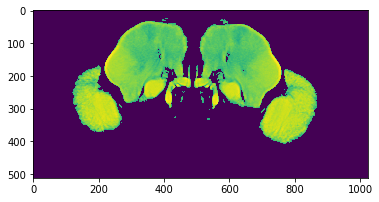

In [119]:
plt.imshow(brain[:,:,60].T)

In [120]:
in_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
jfrc = np.asarray(nib.load(in_file).get_data(), dtype='float32')
jfrc.shape

(1652, 768, 479, 1)

In [17]:
res_JRC2018 = (0.38, 0.38, 0.38)
res_LUKE = (0.65, 0.65, 1)
res_IBNWB = (0.64, 0.64, 1.41)
res_JFRC2010 = (0.62, 0.62, 0.62)
flip_Z = True
type_of_transform = 'Affine'

In [1]:
9

9

In [3]:
### Fixed
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(res_JRC2018)

In [14]:
### Moving
# moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii"
# moving = np.asarray(nib.load(moving_path).get_data().squeeze(), dtype='float32')
moving = brain
if flip_Z:
    moving = moving[:,:,::-1]
moving = ants.from_numpy(moving)
moving.set_spacing(res_LUKE)

In [15]:
moco = ants.registration(fixed, moving, type_of_transform=type_of_transform)

In [17]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210315_luke_expthresh2jfrc_affine'
img = nib.Nifti1Image(moco['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

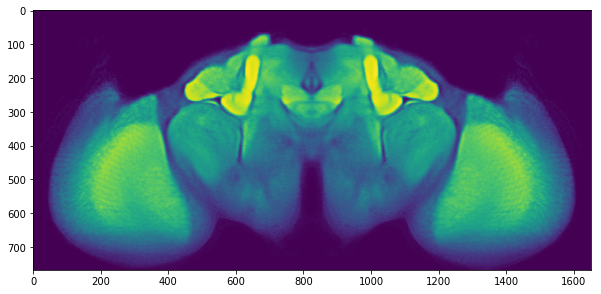

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(moco['warpedmovout'].numpy()[:,:,200].T)

In [ ]:
### Warp jfrc2010 atlas to jrc2018 ###

### Fixed
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(res_JRC2018)

### Moving
moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JFRCtemplate2010.nii"
moving = np.asarray(nib.load(moving_path).get_data().squeeze(), dtype='float32')
moving = ants.from_numpy(moving)
moving.set_spacing(res_JFRC2010)

### Atlas
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JFRCtempate2010.mask130819_Original.nii"
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
atlas = ants.from_numpy(atlas)
atlas.set_spacing(res_JFRC2010)

t0 = time.time()
moco = ants.registration(fixed, moving, type_of_transform='SyN')
print(time.time()-t0)

mimic_moco = ants.apply_transforms(fixed, atlas, moco['fwdtransforms'], interpolator='genericLabel')

save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210315_jfrc2018_atlas'
img = nib.Nifti1Image(mimic_moco.numpy(), np.eye(4)).to_filename(save_file)

In [4]:
### Warp jfrc2010 atlas to jrc2018 ###

### Fixed
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(res_JRC2018)

### Moving
moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JFRCtemplate2010.nii"
moving = np.asarray(nib.load(moving_path).get_data().squeeze(), dtype='float32')
moving = ants.from_numpy(moving)
moving.set_spacing(res_JFRC2010)

### Atlas
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JFRCtempate2010.mask130819_Original.nii"
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
atlas = ants.from_numpy(atlas)
atlas.set_spacing(res_JFRC2010)

In [5]:
t0 = time.time()
moco = ants.registration(fixed, moving, type_of_transform='SyN')
print(time.time()-t0)

3366.704358816147


In [8]:
mimic_moco = ants.apply_transforms(fixed, atlas, moco['fwdtransforms'], interpolator='genericLabel')

In [10]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210315_jfrc2018_atlas'
img = nib.Nifti1Image(mimic_moco.numpy(), np.eye(4)).to_filename(save_file)

In [18]:
### mask sez
to_mask = fixed.numpy()
to_mask[mimic_moco.numpy() == 49] = 0

fixed = ants.from_numpy(to_mask)
fixed.set_spacing(res_JRC2018)

moving = brain
if flip_Z:
    moving = moving[:,:,::-1]
moving = ants.from_numpy(moving)
moving.set_spacing(res_LUKE)

moco = ants.registration(fixed, moving, type_of_transform=type_of_transform)

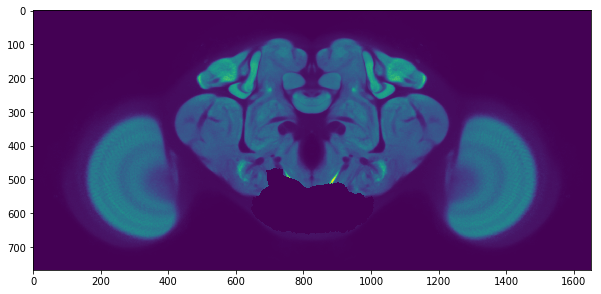

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(fixed[:,:,200].T)

In [22]:
moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii"
moving = np.asarray(nib.load(moving_path).get_data().squeeze(), dtype='float32')
if flip_Z:
    moving = moving[:,:,::-1]
moving = ants.from_numpy(moving)
moving.set_spacing(res_LUKE)

moco = ants.registration(fixed, moving, type_of_transform=type_of_transform)

save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210315_luke2jfrcsezmask_affine'
img = nib.Nifti1Image(moco['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

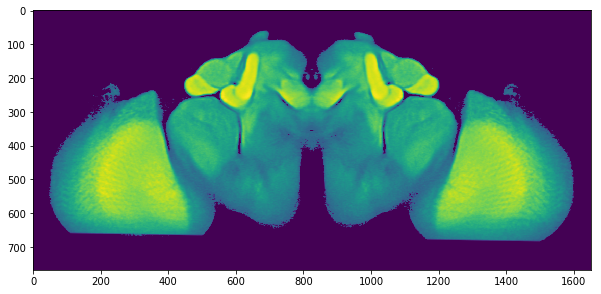

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(moco['warpedmovout'].numpy()[:,:,200].T)

In [20]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210315_lukeexpthresh2jfrcsezmask_affine'
img = nib.Nifti1Image(moco['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

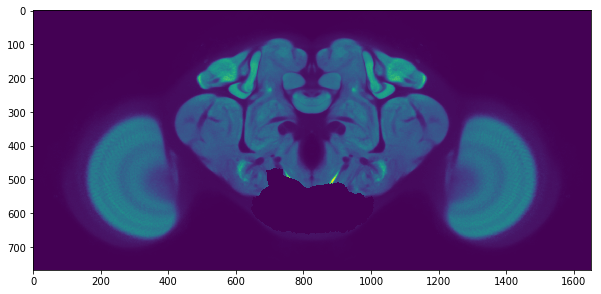

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(to_mask[:,:,200].T)

In [ ]:
# moving = brain
# if flip_Z:
#     moving = moving[:,:,::-1]

In [6]:
3366.704358816147/60

56.11173931360245

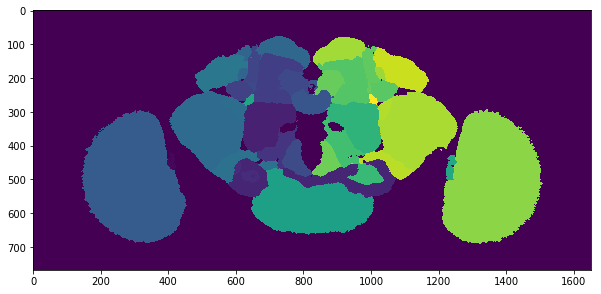

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(mimic_moco.numpy()[:,:,200].T)

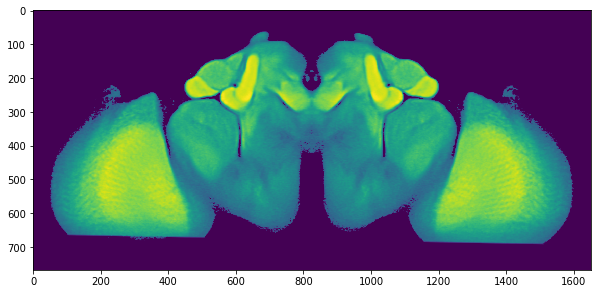

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(moco['warpedmovout'].numpy()[:,:,200].T)

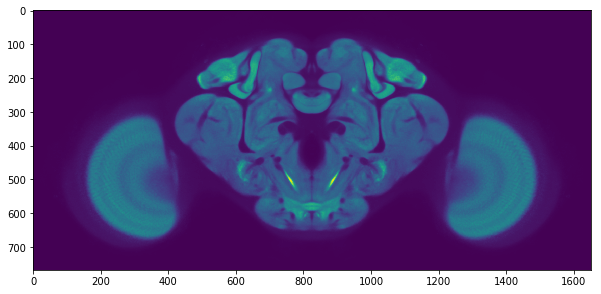

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(fixed.numpy()[:,:,200].T)

In [46]:
num_brain_voxels = np.count_nonzero(brain > 0,axis=(0,1))
slice_mean_intensity = np.mean(brain,axis=(0,1))

fraction_brain_voxels = num_brain_voxels / (1024*512)

mean_brain_intensity = fraction_brain_voxels * slice_mean_intensity

In [54]:
.3/126

0.0023809523809523807

In [59]:
for k,i in enumerate(range(10,20)):
    print(k)

0
1
2
3
4
5
6
7
8
9


In [60]:
brain[brain > 0].shape

(106415567,)

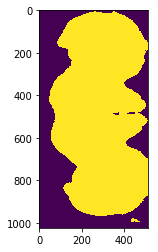

In [71]:
plt.imshow((brain[:,:,200] > 0) * .1)

In [73]:
brain.shape

(1024, 512, 256)

In [56]:
brain[brain == .00238] = 0

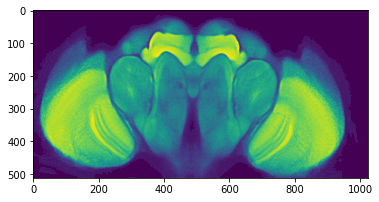

In [75]:
plt.imshow(brain[:,:,150].T)

In [53]:

correction = np.ones((1024,512,126))


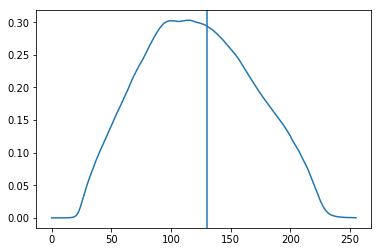

In [50]:
plt.plot(mean_brain_intensity)
plt.axvline(130)

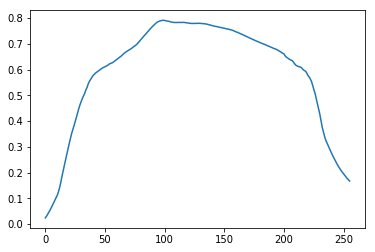

In [45]:
plt.plot(fraction_brain_voxels)

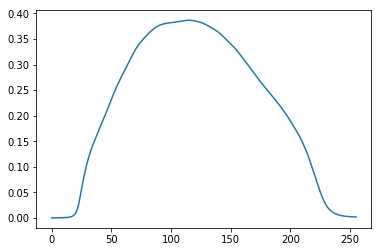

In [48]:
plt.plot(slice_mean_intensity)